In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid_data = pd.read_csv(url)

Vizualize the dataframe by display it.



In [128]:
print(covid_data)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
328991      ZWE    Africa     Zimbabwe  2023-07-22     265666.0        0.0   
328992      ZWE    Africa     Zimbabwe  2023-07-23     265666.0        0.0   
328993      ZWE    Africa     Zimbabwe  2023-07-24     265666.0        0.0   
328994      ZWE    Africa     Zimbabwe  2023-07-25     265666.0        0.0   
328995      ZWE    Africa     Zimbabwe  2023-07-26     265666.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

# **Data Cleaning 🧽**

 Convert the 'date' columns into datatime in order to manipulate it easily:
  *   By using the pandas function to_datatime




In [129]:
# Data Cleaning
covid_data['date'] = pd.to_datetime(covid_data['date'])
print(covid_data)

       iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan 2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan 2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan 2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan 2020-01-07          NaN        0.0   
...         ...       ...          ...        ...          ...        ...   
328991      ZWE    Africa     Zimbabwe 2023-07-22     265666.0        0.0   
328992      ZWE    Africa     Zimbabwe 2023-07-23     265666.0        0.0   
328993      ZWE    Africa     Zimbabwe 2023-07-24     265666.0        0.0   
328994      ZWE    Africa     Zimbabwe 2023-07-25     265666.0        0.0   
328995      ZWE    Africa     Zimbabwe 2023-07-26     265666.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  

##*I am going to choose the relevant columns from the dataset:*
   * 'iso_code'
   * 'location'
   * 'date'
   * 'total_cases'
   * 'total_deaths'
   * 'new_cases'
   * 'new_deaths'
   * 'people_fully_vaccinated_per_hundred'

## *I will remove the following column by not adding it:*

   * 'continent'


In [130]:
cols = ['iso_code', 'location', 'date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths','people_fully_vaccinated_per_hundred', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers']
covid_data = covid_data[cols]
print(covid_data)

       iso_code     location       date  total_cases  total_deaths  new_cases  \
0           AFG  Afghanistan 2020-01-03          NaN           NaN        0.0   
1           AFG  Afghanistan 2020-01-04          NaN           NaN        0.0   
2           AFG  Afghanistan 2020-01-05          NaN           NaN        0.0   
3           AFG  Afghanistan 2020-01-06          NaN           NaN        0.0   
4           AFG  Afghanistan 2020-01-07          NaN           NaN        0.0   
...         ...          ...        ...          ...           ...        ...   
328991      ZWE     Zimbabwe 2023-07-22     265666.0        5711.0        0.0   
328992      ZWE     Zimbabwe 2023-07-23     265666.0        5711.0        0.0   
328993      ZWE     Zimbabwe 2023-07-24     265666.0        5711.0        0.0   
328994      ZWE     Zimbabwe 2023-07-25     265666.0        5711.0        0.0   
328995      ZWE     Zimbabwe 2023-07-26     265666.0        5711.0        0.0   

        new_deaths  people_

The isin() function in Pandas is used to check if each element in a Pandas Series is contained in a specified list or array. "covid_data['iso_code'].isin(countries)" checks whether each element in the 'iso_code' column of the DataFrame covid_data is present in the countries list.




In [131]:
# Filter data for specific countries
countries = ['USA', 'IND', 'BRA', 'RUS', 'GBR', 'CHN', 'ITA']
covid_data_countries = covid_data[covid_data['iso_code'].isin(countries)]
print(covid_data_countries)

       iso_code       location       date  total_cases  total_deaths  \
39042       BRA         Brazil 2020-01-03          NaN           NaN   
39043       BRA         Brazil 2020-01-04          NaN           NaN   
39044       BRA         Brazil 2020-01-05          NaN           NaN   
39045       BRA         Brazil 2020-01-06          NaN           NaN   
39046       BRA         Brazil 2020-01-07          NaN           NaN   
...         ...            ...        ...          ...           ...   
310871      USA  United States 2023-07-22  103436829.0     1127152.0   
310872      USA  United States 2023-07-23  103436829.0     1127152.0   
310873      USA  United States 2023-07-24  103436829.0     1127152.0   
310874      USA  United States 2023-07-25  103436829.0     1127152.0   
310875      USA  United States 2023-07-26  103436829.0     1127152.0   

        new_cases  new_deaths  people_fully_vaccinated_per_hundred  \
39042         0.0         0.0                                  Na

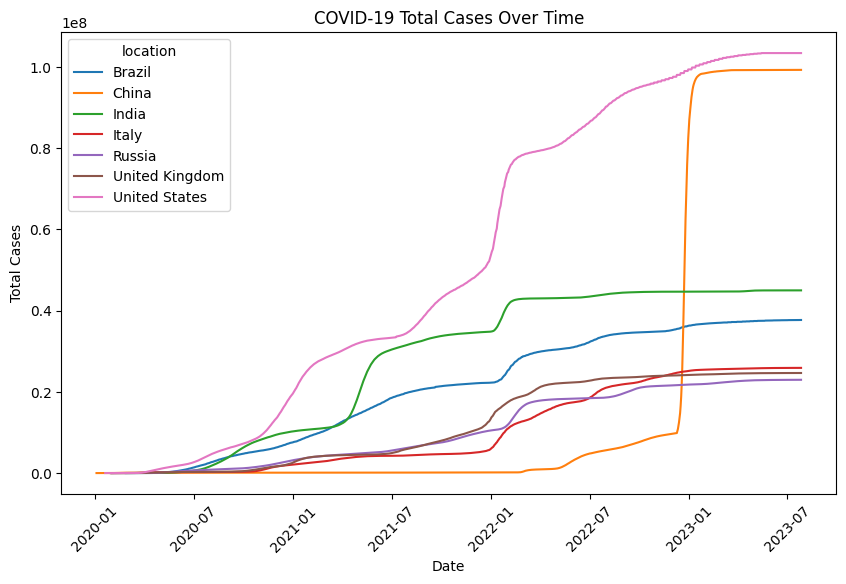

In [132]:
# Data Visualization - Total Cases over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='total_cases', hue='location')
plt.title('COVID-19 Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()


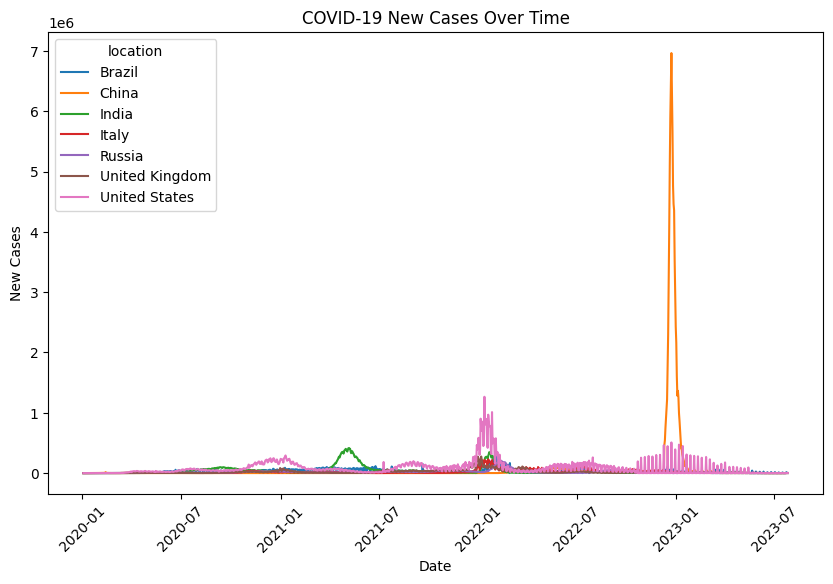

In [133]:

# Data Visualization - New Cases over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='new_cases', hue='location')
plt.title('COVID-19 New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.show()

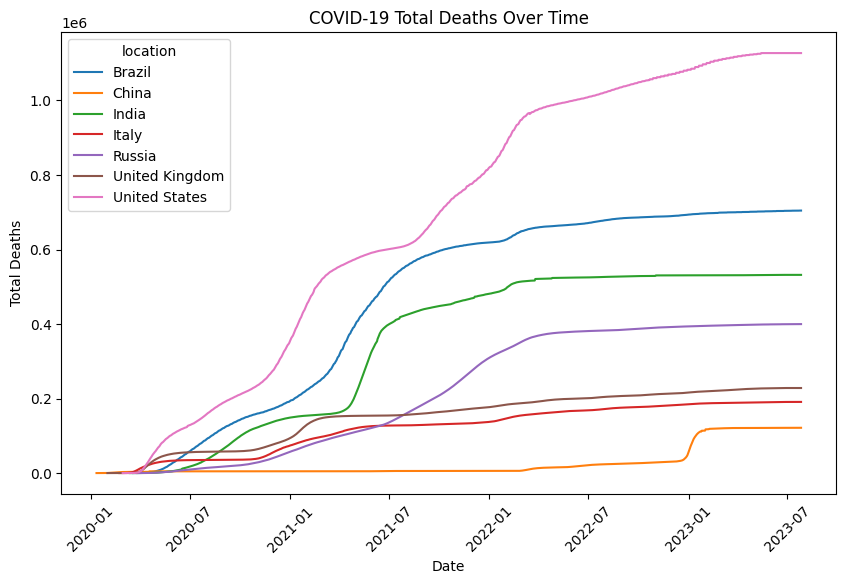

In [134]:
# Data Visualization - Total Deaths over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='total_deaths', hue='location')
plt.title('COVID-19 Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

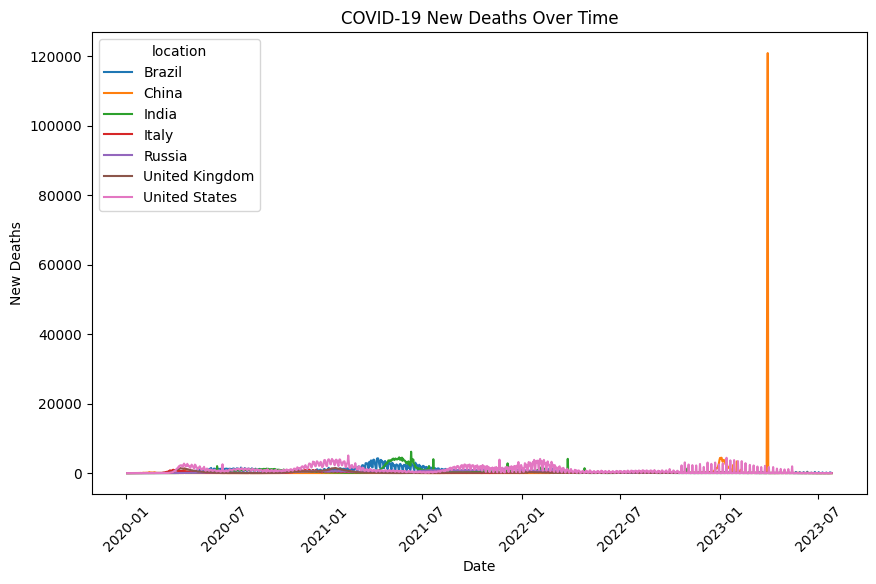

In [135]:
# Data Visualization - New Deaths over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='new_deaths', hue='location')
plt.title('COVID-19 New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.xticks(rotation=45)
plt.show()

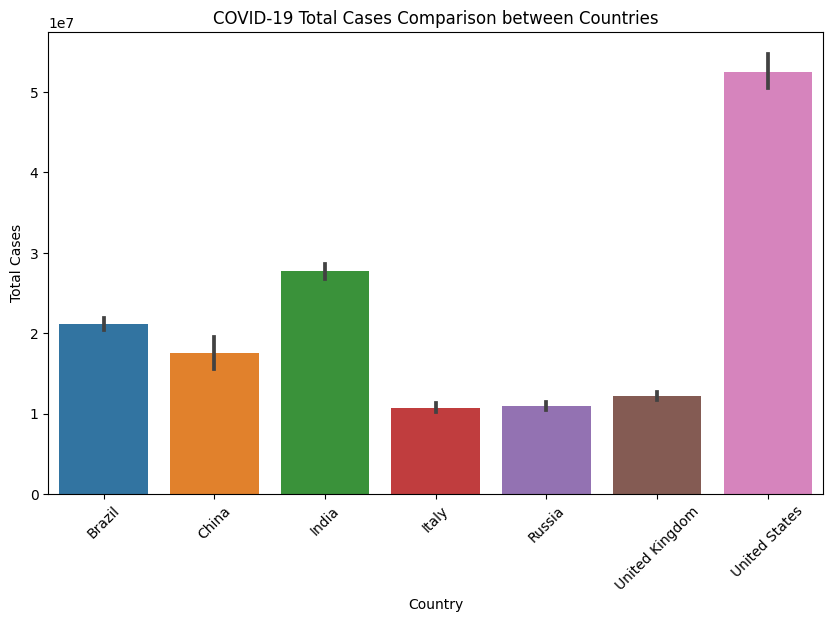

In [136]:
# Data Visualization - Cases Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=covid_data_countries, x='location', y='total_cases')
plt.title('COVID-19 Total Cases Comparison between Countries')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

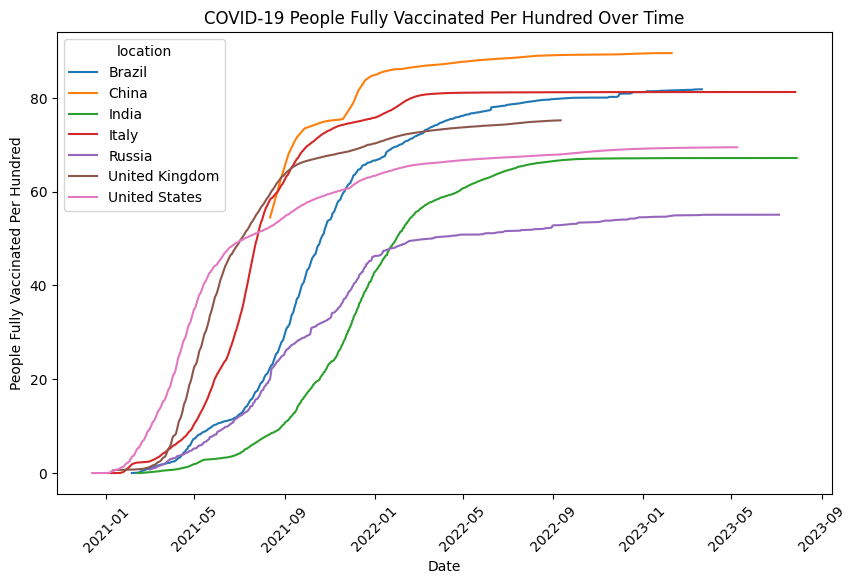

In [137]:
# Data Visualization - People Fully Vaccinated Per Hundred over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_data_countries, x='date', y='people_fully_vaccinated_per_hundred', hue='location')
plt.title('COVID-19 People Fully Vaccinated Per Hundred Over Time')
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated Per Hundred')
plt.xticks(rotation=45)
plt.show()

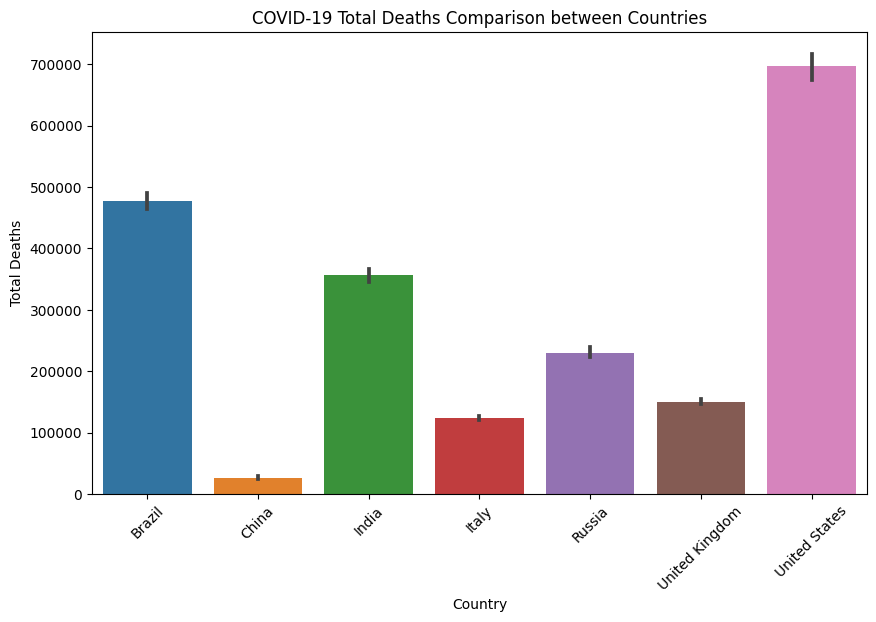

In [138]:
# Data Visualization - Deaths Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=covid_data_countries, x='location', y='total_deaths')
plt.title('COVID-19 Total Deaths Comparison between Countries')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()

China had more people fully vaccinated compare to United States that can
explain the low rate of death cmpare to Uniited States.

check health
BB->BF

In [139]:
print(covid_data)

       iso_code     location       date  total_cases  total_deaths  new_cases  \
0           AFG  Afghanistan 2020-01-03          NaN           NaN        0.0   
1           AFG  Afghanistan 2020-01-04          NaN           NaN        0.0   
2           AFG  Afghanistan 2020-01-05          NaN           NaN        0.0   
3           AFG  Afghanistan 2020-01-06          NaN           NaN        0.0   
4           AFG  Afghanistan 2020-01-07          NaN           NaN        0.0   
...         ...          ...        ...          ...           ...        ...   
328991      ZWE     Zimbabwe 2023-07-22     265666.0        5711.0        0.0   
328992      ZWE     Zimbabwe 2023-07-23     265666.0        5711.0        0.0   
328993      ZWE     Zimbabwe 2023-07-24     265666.0        5711.0        0.0   
328994      ZWE     Zimbabwe 2023-07-25     265666.0        5711.0        0.0   
328995      ZWE     Zimbabwe 2023-07-26     265666.0        5711.0        0.0   

        new_deaths  people_